# 🎯 CLASSIFICATION EN MACHINE LEARNING - COMPARAISON D'ALGORITHMES

## 📚 Objectifs de ce Notebook

Dans ce notebook, nous allons :
1. **Comprendre** les concepts de base de la classification
2. **Explorer** les métriques d'évaluation essentielles
3. **Découvrir** un panorama des algorithmes de classification
4. **Comparer** 4 algorithmes populaires sur le dataset Titanic :
   - 🧠 **Naive Bayes** : Probabilités conditionnelles
   - 🌳 **Decision Trees** : Arbres de décision
   - 📈 **Logistic Regression** : Régression logistique
   - 👥 **K-Nearest Neighbors** : Plus proches voisins

---

## 🧠 PARTIE 1: CLASSIFICATION INTUITIVE

### 🤔 Votre Cerveau Fait Déjà de la Classification !

**Exemple quotidien :** Comment décidez-vous si un email est un SPAM ?

🔍 **Indices que vous utilisez :**
- Expéditeur inconnu ? → Suspect
- Fautes d'orthographe ? → Suspect  
- "URGENT" en majuscules ? → Suspect
- Demande d'argent ? → Très suspect

**🎯 Processus mental :**
1. **Observer** les caractéristiques (features)
2. **Comparer** avec vos expériences passées
3. **Décider** : SPAM ou PAS SPAM

**C'est exactement ce que fait un algorithme de classification !**

In [4]:
# Configuration de l'environnement
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Configuration graphique
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

print("🚀 Environnement configuré pour l'apprentissage !")

🚀 Environnement configuré pour l'apprentissage !


### 🎯 Classification vs Régression

| **Classification** | **Régression** |
|-------------------|----------------|
| Prédit des **catégories** | Prédit des **valeurs numériques** |
| Spam/Pas Spam | Prix d'une maison |
| Survivant/Décédé | Température demain |
| Chat/Chien/Oiseau | Note d'un étudiant |

### 🔢 Types de Classification

**🎯 Classification Binaire :** 2 classes
- Exemple : Diagnostic médical (Malade/Sain)

**🎯 Classification Multi-classe :** 3+ classes  
- Exemple : Reconnaissance d'images (Chat/Chien/Oiseau)

**🎯 Classification Multi-label :** Plusieurs étiquettes possibles
- Exemple : Tags d'articles (Sport ET Politique ET International)

---


## 📊 PARTIE 2: MÉTRIQUES D'ÉVALUATION ESSENTIELLES

## 🚀 Introduction avec exemple concret

Supposons qu'on ait un modèle de détection de spam sur 100 emails :

```python
# Valeurs réelles (ground truth)
y_true = [1, 0, 1, 0, 1, 1, 0, 0, 1, 0, ...]  # 1=Spam, 0=Légitime

# Valeurs prédites par notre modèle  
y_pred = [1, 0, 0, 0, 1, 1, 1, 0, 1, 0, ...]  # 1=Spam, 0=Légitime
```

**Résultats de notre exemple :**
- ✅ **Vrais Positifs (TP) = 15** → SPAM correctement détectés
- ❌ **Faux Positifs (FP) = 5** → Légitimes classés comme SPAM  
- ❌ **Faux Négatifs (FN) = 5** → SPAM ratés
- ✅ **Vrais Négatifs (TN) = 75** → Légitimes correctement classés

---

## 🎯 Matrice de Confusion

La **matrice de confusion** est un tableau qui permet de visualiser les performances d'un modèle de classification en comparant les prédictions aux vraies étiquettes.

|                    | **Prédiction Positive** | **Prédiction Négative** |
|--------------------|-------------------------|-------------------------|
| **Réalité Positive** | Vrais Positifs (TP)     | Faux Négatifs (FN)      |
| **Réalité Négative** | Faux Positifs (FP)      | Vrais Négatifs (TN)     |

---

## 📈 Métriques principales

### 🎯 Accuracy (Exactitude)
**Définition :** Proportion de prédictions correctes parmi toutes les prédictions.

```
Accuracy = (TP + TN) / (TP + TN + FP + FN)
```

**Interprétation :** Mesure globale de performance. 
Dans notre exemple : `(15 + 75) / 100 = 90%` ✨

---

### 🔍 Precision (Précision)
**Définition :** Proportion de vrais positifs parmi toutes les prédictions positives.

```
Precision = TP / (TP + FP)
```

**Interprétation :** "Quand le modèle dit SPAM, à quelle fréquence a-t-il raison ?" 
Dans notre exemple : `15 / (15 + 5) = 75%`
- Importante quand les **faux positifs** coûtent cher.

---

### 🎣 Recall (Rappel/Sensibilité)
**Définition :** Proportion de vrais positifs détectés parmi tous les cas réellement positifs.

```
Recall = TP / (TP + FN)
```

**Interprétation :** "Quelle proportion de SPAM le modèle arrive-t-il à détecter ?"
Dans notre exemple : `15 / (15 + 5) = 75%`
- Importante quand les **faux négatifs** coûtent cher.

---

### ⚖️ F1-Score
**Définition :** Moyenne harmonique entre Precision et Recall.

```
F1-Score = 2 × (Precision × Recall) / (Precision + Recall)
```

**Interprétation :** Équilibre entre Precision et Recall. 
Dans notre exemple : `2 × (0.75 × 0.75) / (0.75 + 0.75) = 75%`

---

## 💡 Conseil pratique

- **Accuracy** → Performance globale
- **Precision** → Éviter les fausses alarmes  
- **Recall** → Ne rien manquer d'important
- **F1-Score** → Équilibre optimal

In [5]:
# Démonstration interactive des métriques
def demo_metriques_interactives():
    """Démonstration des métriques avec un exemple concret"""
    
    print("📊 DÉMONSTRATION DES MÉTRIQUES")
    print("=" * 50)
    
    # Exemple : Détection de spam sur 100 emails
    print("📧 Exemple : Détection de SPAM sur 100 emails")
    print("   - 20 vrais SPAM")
    print("   - 80 emails légitimes")
    print()
    
    # Résultats du modèle
    vrais_positifs = 15    # SPAM correctement détectés
    faux_positifs = 5     # Légitimes classés comme SPAM
    vrais_negatifs = 75   # Légitimes correctement classés
    faux_negatifs = 5     # SPAM ratés
    
    print("🔍 RÉSULTATS DU MODÈLE :")
    print(f"   ✅ Vrais Positifs (TP)  : {vrais_positifs} - SPAM détectés correctement")
    print(f"   ❌ Faux Positifs (FP)   : {faux_positifs} - Légitimes classés SPAM")
    print(f"   ✅ Vrais Négatifs (TN)  : {vrais_negatifs} - Légitimes détectés correctement") 
    print(f"   ❌ Faux Négatifs (FN)   : {faux_negatifs} - SPAM ratés")
    print()
    
    # Calcul des métriques
    accuracy = (vrais_positifs + vrais_negatifs) / 100
    precision = vrais_positifs / (vrais_positifs + faux_positifs)
    recall = vrais_positifs / (vrais_positifs + faux_negatifs)
    f1 = 2 * (precision * recall) / (precision + recall)
    
    print("📈 MÉTRIQUES CALCULÉES :")
    print(f"   🎯 Accuracy  : {accuracy:.1%} - Pourcentage global correct")
    print(f"   🔍 Precision : {precision:.1%} - Fiabilité des détections SPAM")
    print(f"   📡 Recall    : {recall:.1%} - Capacité à détecter les SPAM")
    print(f"   ⚖️  F1-Score  : {f1:.1%} - Équilibre Precision/Recall")
    print()
    
    print("💡 INTERPRÉTATION :")
    print(f"   • Sur 100 emails, {accuracy:.0%} sont bien classés")
    print(f"   • Quand le modèle dit 'SPAM', il a raison {precision:.0%} du temps")
    print(f"   • Il détecte {recall:.0%} des vrais SPAM")
    print(f"   • F1-Score = {f1:.0%} (bon équilibre)")

# Exécution de la démonstration
demo_metriques_interactives()

📊 DÉMONSTRATION DES MÉTRIQUES
📧 Exemple : Détection de SPAM sur 100 emails
   - 20 vrais SPAM
   - 80 emails légitimes

🔍 RÉSULTATS DU MODÈLE :
   ✅ Vrais Positifs (TP)  : 15 - SPAM détectés correctement
   ❌ Faux Positifs (FP)   : 5 - Légitimes classés SPAM
   ✅ Vrais Négatifs (TN)  : 75 - Légitimes détectés correctement
   ❌ Faux Négatifs (FN)   : 5 - SPAM ratés

📈 MÉTRIQUES CALCULÉES :
   🎯 Accuracy  : 90.0% - Pourcentage global correct
   🔍 Precision : 75.0% - Fiabilité des détections SPAM
   📡 Recall    : 75.0% - Capacité à détecter les SPAM
   ⚖️  F1-Score  : 75.0% - Équilibre Precision/Recall

💡 INTERPRÉTATION :
   • Sur 100 emails, 90% sont bien classés
   • Quand le modèle dit 'SPAM', il a raison 75% du temps
   • Il détecte 75% des vrais SPAM
   • F1-Score = 75% (bon équilibre)


### 🎯 Pourquoi Plusieurs Métriques ?

**Problème :** L'accuracy seule peut être trompeuse !

**Exemple :** Détection de fraude bancaire
- 99% des transactions sont légitimes
- Un modèle qui prédit toujours "Légitimes" aura 99% d'accuracy
- Mais il ne détectera AUCUNE fraude ! 😱

### 🎨 Visualisation : Matrice de Confusion

La **matrice de confusion** est l'outil visuel le plus important pour comprendre les performances.

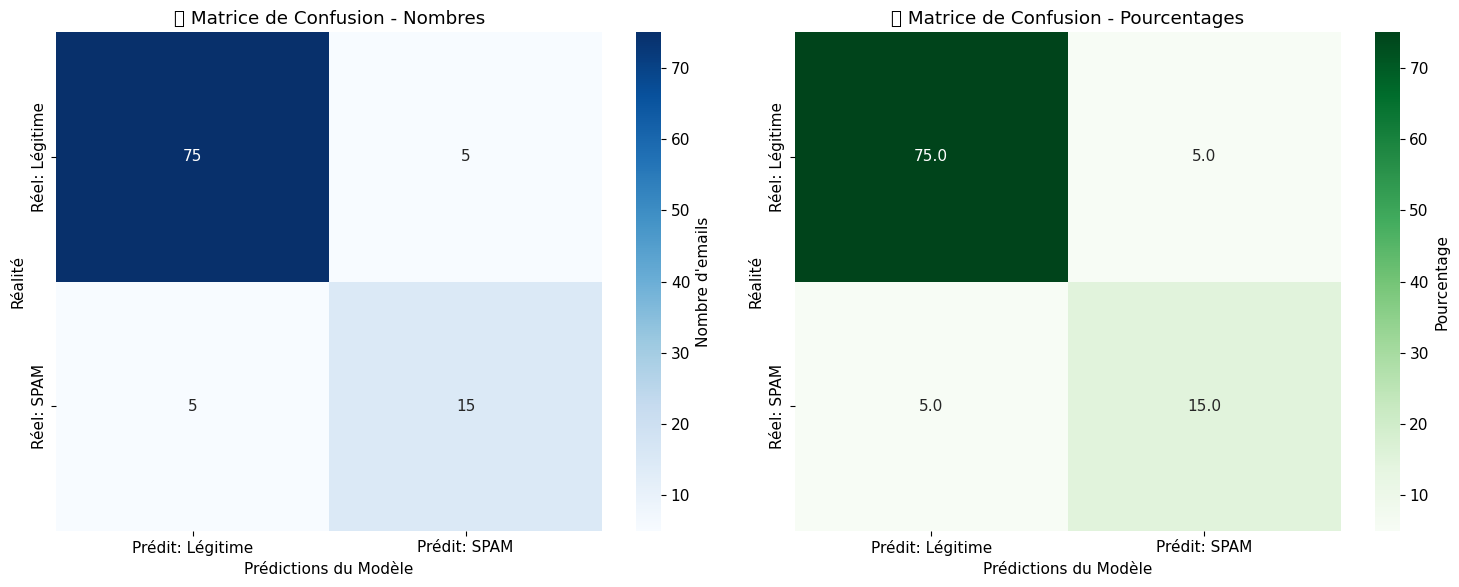

🔍 LECTURE DE LA MATRICE :
   📗 Cases foncées (diagonale) : Prédictions correctes
   📙 Cases moins foncées  (hors diagonale) : Erreurs
   🎯 Objectif : Maximiser la diagonale !


In [7]:
# Visualisation de la matrice de confusion
def plot_confusion_matrix_demo():
    """Visualisation pédagogique de la matrice de confusion"""
    
    # Données de l'exemple précédent
    cm = np.array([[75, 5],   # Ligne 1: Vrais Légitimes
                   [5, 15]])  # Ligne 2: Vrais SPAM
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Matrice de confusion avec nombres
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
                xticklabels=['Prédit: Légitime', 'Prédit: SPAM'],
                yticklabels=['Réel: Légitime', 'Réel: SPAM'],
                cbar_kws={'label': 'Nombre d\'emails'})
    ax1.set_title('📊 Matrice de Confusion - Nombres')
    ax1.set_xlabel('Prédictions du Modèle')
    ax1.set_ylabel('Réalité')
    
    # Matrice de confusion en pourcentages
    cm_percent = cm / cm.sum() * 100
    sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Greens', ax=ax2,
                xticklabels=['Prédit: Légitime', 'Prédit: SPAM'],
                yticklabels=['Réel: Légitime', 'Réel: SPAM'],
                cbar_kws={'label': 'Pourcentage'})
    ax2.set_title('📊 Matrice de Confusion - Pourcentages')
    ax2.set_xlabel('Prédictions du Modèle')
    ax2.set_ylabel('Réalité')
    
    plt.tight_layout()
    plt.show()
    
    print("🔍 LECTURE DE LA MATRICE :")
    print("   📗 Cases foncées (diagonale) : Prédictions correctes")
    print("   📙 Cases moins foncées  (hors diagonale) : Erreurs")
    print("   🎯 Objectif : Maximiser la diagonale !")

# Affichage de la visualisation
plot_confusion_matrix_demo()

### 🤔 Exercice Interactif 1 : Choix de Métrique

**Scénario :** Vous développez un système de détection de cancer.

**Question :** Quelle métrique privilégier ?

A) **Accuracy** - Pourcentage global correct
B) **Precision** - Fiabilité des diagnostics positifs  
C) **Recall** - Capacité à détecter tous les cancers
D) **F1-Score** - Équilibre des deux

**🤔 Réfléchissez avant de voir la réponse...**

**💡 Réponse :** **RECALL** ! 
- Il vaut mieux avoir des faux positifs (stress inutile) 
- Que des faux négatifs (cancer non détecté = danger mortel)
- En médecine : "Mieux vaut prévenir que guérir"

### 🎯 Règles de Choix des Métriques

- **Precision importante** : Quand les faux positifs coûtent cher
- **Recall important** : Quand les faux négatifs coûtent cher
- **F1-Score** : Quand vous voulez un équilibre

| **Contexte** | **Métrique Prioritaire** | **Raison** |
|--------------|-------------------------|------------|
| **Détection médicale** | Recall | Ne pas rater de malades |
| **Filtrage spam** | Precision | Ne pas bloquer d'emails importants |
| **Reconnaissance vocale** | Accuracy | Performance globale |
| **Détection fraude** | F1-Score | Équilibre détection/faux positifs |

---


## 🎓 Récapitulatif Partie 1-2

### ✅ Ce que nous avons appris :

1. **🧠 Classification Intuitive**
   - Votre cerveau fait déjà de la classification
   - Processus : Observer → Comparer → Décider

2. **📊 Métriques Essentielles**
   - **Accuracy** : Performance globale
   - **Precision** : Fiabilité des prédictions positives
   - **Recall** : Capacité à détecter tous les positifs
   - **F1-Score** : Équilibre Precision/Recall


### 🚀 Prochaine étape :
**Panorama des algorithmes de classification !**

## 🌐 PARTIE 4: PANORAMA DES ALGORITHMES DE CLASSIFICATION

### 🎯 La Grande Famille des Algorithmes

Il existe des dizaines d'algorithmes de classification ! Voici un aperçu organisé :

### 📊 **Algorithmes Linéaires**
- **Régression Logistique** : Simple, rapide, interprétable
- **SVM Linéaire** : Bon pour données haute dimension
- **Perceptron** : Ancêtre des réseaux de neurones

### 🌳 **Algorithmes Basés sur les Arbres**
- **Decision Trees** : Très interprétables, règles simples
- **Random Forest** : Ensemble d'arbres, très performant
- **Gradient Boosting** : XGBoost, LightGBM (compétitions Kaggle)

### 👥 **Algorithmes Basés sur la Distance**
- **K-Nearest Neighbors (KNN)** : Simple, pas d'entraînement
- **K-Means** : Pour le clustering principalement

### 🧠 **Algorithmes Probabilistes**
- **Naive Bayes** : Rapide, bon pour le texte
- **Gaussian Mixture Models** : Modèles de mélanges

### 🤖 **Algorithmes Avancés**
- **Neural Networks** : Deep Learning, très puissants
- **SVM non-linéaire** : Kernel tricks
- **Ensemble Methods** : Combinaisons d'algorithmes

### 🎯 **Comment Choisir ?**

| **Critère** | **Algorithme Recommandé** |
|-------------|---------------------------|
| **Simplicité** | Naive Bayes, Decision Trees |
| **Performance** | Random Forest, XGBoost |
| **Interprétabilité** | Decision Trees, Logistic Regression |
| **Rapidité** | Naive Bayes, KNN |
| **Peu de données** | Naive Bayes, KNN |
| **Beaucoup de données** | Logistic Regression, Neural Networks |

---

## 🧠 PARTIE 5: NAIVE BAYES - LE PROBABILISTE

### 🤔 L'Idée Intuitive

**Question :** Comment votre cerveau décide-t-il si un email est un SPAM ?

**Réponse :** Vous calculez inconsciemment des probabilités !

**Exemple :**
- Mot "URGENT" → 80% des SPAM contiennent ce mot
- Mot "gratuit" → 70% des SPAM contiennent ce mot  
- Expéditeur inconnu → 60% des SPAM viennent d'inconnus

**Naive Bayes fait exactement ça, mais avec des maths !**

### 📐 Le Principe (Sans Maths Complexes)

**Étape 1 :** Calculer P(SPAM | caractéristiques)
**Étape 2 :** Calculer P(LÉGITIME | caractéristiques)  
**Étape 3 :** Choisir la probabilité la plus élevée

**Pourquoi "Naive" ?** 
Il suppose que toutes les caractéristiques sont indépendantes (ce qui est souvent faux, mais ça marche bien quand même !)

### ✅ Avantages
- **Très rapide** à entraîner et prédire
- **Fonctionne bien** avec peu de données
- **Excellent** pour la classification de texte
- **Probabilités** : donne des scores de confiance

### ❌ Inconvénients  
- **Hypothèse naive** : indépendance des features
- **Sensible** aux features non pertinentes
- **Performance limitée** sur données complexes

In [8]:
# Démonstration conceptuelle de Naive Bayes
def demo_naive_bayes_concept():
    """Démonstration conceptuelle de Naive Bayes"""
    
    print("🧠 NAIVE BAYES - DÉMONSTRATION CONCEPTUELLE")
    print("=" * 55)
    
    print("📧 Exemple : Classification d'emails")
    print("Données d'entraînement :")
    print("  SPAM     : 'urgent', 'gratuit', 'argent'")
    print("  LÉGITIME : 'réunion', 'projet', 'merci'")
    print()
    
    print("🔍 Nouvel email à classifier : 'urgent gratuit'")
    print()
    
    # Probabilités simulées (normalement calculées sur les données)
    print("📊 Probabilités apprises :")
    print("  P('urgent' | SPAM) = 0.8")
    print("  P('gratuit' | SPAM) = 0.7") 
    print("  P('urgent' | LÉGITIME) = 0.1")
    print("  P('gratuit' | LÉGITIME) = 0.05")
    print("  P(SPAM) = 0.3")
    print("  P(LÉGITIME) = 0.7")
    print()
    
    # Calculs simplifiés
    spam_score = 0.3 * 0.8 * 0.7  # P(SPAM) * P(urgent|SPAM) * P(gratuit|SPAM)
    legit_score = 0.7 * 0.1 * 0.05  # P(LÉGITIME) * P(urgent|LÉGITIME) * P(gratuit|LÉGITIME)
    
    print("🧮 Calculs Naive Bayes :")
    print(f"  Score SPAM     : {spam_score:.4f}")
    print(f"  Score LÉGITIME : {legit_score:.4f}")
    print()
    
    prediction = "SPAM" if spam_score > legit_score else "LÉGITIME"
    confidence = spam_score / (spam_score + legit_score) if prediction == "SPAM" else legit_score / (spam_score + legit_score)
    
    print(f"🎯 PRÉDICTION : {prediction}")
    print(f"🔍 CONFIANCE : {confidence:.1%}")
    print()
    print("💡 L'algorithme a choisi SPAM car le score est plus élevé !")

# Exécution de la démonstration
demo_naive_bayes_concept()

🧠 NAIVE BAYES - DÉMONSTRATION CONCEPTUELLE
📧 Exemple : Classification d'emails
Données d'entraînement :
  SPAM     : 'urgent', 'gratuit', 'argent'
  LÉGITIME : 'réunion', 'projet', 'merci'

🔍 Nouvel email à classifier : 'urgent gratuit'

📊 Probabilités apprises :
  P('urgent' | SPAM) = 0.8
  P('gratuit' | SPAM) = 0.7
  P('urgent' | LÉGITIME) = 0.1
  P('gratuit' | LÉGITIME) = 0.05
  P(SPAM) = 0.3
  P(LÉGITIME) = 0.7

🧮 Calculs Naive Bayes :
  Score SPAM     : 0.1680
  Score LÉGITIME : 0.0035

🎯 PRÉDICTION : SPAM
🔍 CONFIANCE : 98.0%

💡 L'algorithme a choisi SPAM car le score est plus élevé !


---

## 🌳 PARTIE 6: DECISION TREES - L'ARBRE DÉCISIONNEL

### 🤔 L'Idée Intuitive

**Question :** Comment un médecin diagnostique-t-il une maladie ?

**Processus :**
1. Température > 38°C ? → Si OUI, continuer
2. Toux présente ? → Si OUI, continuer  
3. Mal de gorge ? → Si OUI → Diagnostic : Grippe

**C'est exactement un arbre de décision !**

### 🌳 Structure d'un Arbre

```
                    Âge < 16 ans ?
                   /              \
                OUI                NON
                /                    \
        Sexe = Femme ?          Classe = 1ère ?
        /          \            /            \
     OUI          NON        OUI           NON
     /            /          /              \
Survivant    Décédé    Survivant         Décédé
```

### 🎯 Comment ça Marche ?

**Étape 1 :** Trouver la meilleure question à poser
**Étape 2 :** Diviser les données selon la réponse
**Étape 3 :** Répéter jusqu'à avoir des groupes "purs"

**Critère de "pureté" :** Gini, Entropie (mesures mathématiques)

### ✅ Avantages
- **Très interprétable** : règles simples à comprendre
- **Pas de préparation** des données nécessaire
- **Gère** les variables catégorielles et numériques
- **Rapide** à entraîner et prédire

### ❌ Inconvénients
- **Overfitting** : peut mémoriser les données d'entraînement
- **Instable** : petit changement → arbre différent
- **Biais** vers les variables avec plus de valeurs

In [9]:
# Visualisation conceptuelle d'un arbre de décision
def demo_decision_tree_concept():
    """Démonstration conceptuelle d'un arbre de décision"""
    
    print("🌳 DECISION TREE - DÉMONSTRATION CONCEPTUELLE")
    print("=" * 55)
    
    print("🚢 Exemple : Survie sur le Titanic")
    print()
    print("🌳 Arbre de décision simplifié :")
    print()
    print("                 Sexe = Femme ?")
    print("                /              \\")
    print("             OUI                NON")
    print("             /                    \\")
    print("      Classe ≤ 2 ?           Âge < 16 ?")
    print("      /        \\              /        \\")
    print("   OUI        NON          OUI        NON")
    print("   /           /            /          \\")
    print("Survivant   Décédé    Survivant    Décédé")
    print("  (95%)      (50%)      (80%)      (20%)")
    print()
    
    # Test sur des profils
    profils = [
        ("Femme, 25 ans, 1ère classe", "Femme", 25, 1),
        ("Homme, 8 ans, 3ème classe", "Homme", 8, 3),
        ("Homme, 35 ans, 2ème classe", "Homme", 35, 2)
    ]
    
    print("🔮 Test sur nouveaux profils :")
    print("-" * 40)
    
    for desc, sexe, age, classe in profils:
        print(f"\n👤 {desc}")
        
        if sexe == "Femme":
            if classe <= 2:
                prediction = "Survivant (95%)"
                chemin = "Femme → Classe ≤ 2 → Survivant"
            else:
                prediction = "Décédé (50%)"
                chemin = "Femme → Classe > 2 → Décédé"
        else:  # Homme
            if age < 16:
                prediction = "Survivant (80%)"
                chemin = "Homme → Âge < 16 → Survivant"
            else:
                prediction = "Décédé (20%)"
                chemin = "Homme → Âge ≥ 16 → Décédé"
        
        print(f"   🌳 Chemin : {chemin}")
        print(f"   🎯 Prédiction : {prediction}")

# Exécution de la démonstration
demo_decision_tree_concept()

🌳 DECISION TREE - DÉMONSTRATION CONCEPTUELLE
🚢 Exemple : Survie sur le Titanic

🌳 Arbre de décision simplifié :

                 Sexe = Femme ?
                /              \
             OUI                NON
             /                    \
      Classe ≤ 2 ?           Âge < 16 ?
      /        \              /        \
   OUI        NON          OUI        NON
   /           /            /          \
Survivant   Décédé    Survivant    Décédé
  (95%)      (50%)      (80%)      (20%)

🔮 Test sur nouveaux profils :
----------------------------------------

👤 Femme, 25 ans, 1ère classe
   🌳 Chemin : Femme → Classe ≤ 2 → Survivant
   🎯 Prédiction : Survivant (95%)

👤 Homme, 8 ans, 3ème classe
   🌳 Chemin : Homme → Âge < 16 → Survivant
   🎯 Prédiction : Survivant (80%)

👤 Homme, 35 ans, 2ème classe
   🌳 Chemin : Homme → Âge ≥ 16 → Décédé
   🎯 Prédiction : Décédé (20%)


---

## 📈 PARTIE 7: LOGISTIC REGRESSION - LA RÉGRESSION LOGISTIQUE

### 🤔 L'Idée Intuitive

**Question :** Comment combiner plusieurs facteurs pour prendre une décision ?

**Exemple :** Accepter un prêt bancaire
- Salaire élevé → +2 points
- Historique crédit bon → +3 points  
- Âge jeune → -1 point
- **Total : 4 points → Sigmoïde → 98% → ACCEPTÉ**

**C'est la régression logistique !**

### 🧮 Le Processus

**Étape 1 :** Calculer un score linéaire
```
Score = w₁×Feature₁ + w₂×Feature₂ + ... + biais
```

**Étape 2 :** Transformer avec la sigmoïde
```
Probabilité = 1 / (1 + e^(-Score))
```
####  Pourquoi la Sigmoïde ?

**Problème :** Comment transformer n'importe quel nombre en probabilité ?
- Un score peut être : -1000, 0, 5.7, +1000...
- Une probabilité doit être : entre 0 et 1 (0% à 100%)

**Solution :** La fonction sigmoïde !

**Formule :** `σ(x) = 1 / (1 + e^(-x))`

**Étape 3 :** Décider selon un seuil (généralement 0.5)

### 🎯 Apprentissage des Coefficients

L'algorithme ajuste automatiquement les poids (w₁, w₂, ...) pour minimiser les erreurs sur les données d'entraînement.

### ✅ Avantages
- **Simple** et rapide
- **Probabilités** : scores de confiance
- **Interprétable** : coefficients = importance
- **Pas d'overfitting** facilement
- **Baseline** parfaite pour commencer

### ❌ Inconvénients
- **Linéaire** : ne capture pas les relations complexes
- **Sensible** aux outliers
- **Suppose** une relation linéaire entre features et log-odds

🌊 DÉMONSTRATION SIGMOÏDE
Score  →  Probabilité  →  Décision
-----------------------------------
 -3.0  →      4.7%     →  Classe 0 ❌   (Très sûr)
 -1.0  →     26.9%     →  Classe 0 ❌   (Moyennement sûr)
  0.0  →     50.0%     →  Classe 0 ❌   (Incertain)
  1.0  →     73.1%     →  Classe 1 ✅   (Moyennement sûr)
  3.0  →     95.3%     →  Classe 1 ✅   (Très sûr)


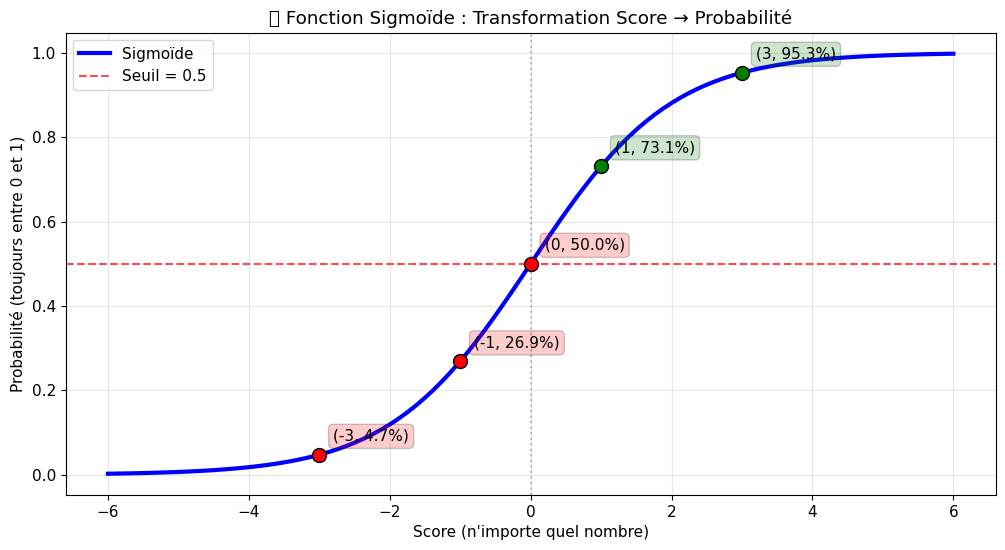


💡 PROPRIÉTÉS CLÉS :
• Score = 0 → Probabilité = 50% (frontière de décision)
• Score positif → Plus de chances pour la classe 1
• Score négatif → Plus de chances pour la classe 0
• Plus le score est extrême, plus on est sûr de la décision


In [10]:
# Démonstration de la fonction sigmoïde
def demo_sigmoid():
    """Démonstration interactive de la sigmoïde"""
    
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))
    
    print("🌊 DÉMONSTRATION SIGMOÏDE")
    print("=" * 40)
    
    # Exemples de transformation
    scores = [-3, -1, 0, 1, 3]
    print("Score  →  Probabilité  →  Décision")
    print("-" * 35)
    
    for score in scores:
        prob = sigmoid(score)
        decision = "Classe 1 ✅" if prob > 0.5 else "Classe 0 ❌"
        confidence = "Très sûr" if abs(prob - 0.5) > 0.3 else "Moyennement sûr" if abs(prob - 0.5) > 0.1 else "Incertain"
        print(f"{score:5.1f}  →  {prob:8.1%}     →  {decision:12} ({confidence})")
    
    # Visualisation
    x = np.linspace(-6, 6, 100)
    y = sigmoid(x)
    
    plt.figure(figsize=(12, 6))
    plt.plot(x, y, 'b-', linewidth=3, label='Sigmoïde')
    plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.7, label='Seuil = 0.5')
    plt.axvline(x=0, color='gray', linestyle=':', alpha=0.5)
    
    # Points d'exemple
    for score in scores:
        prob = sigmoid(score)
        color = 'green' if prob > 0.5 else 'red'
        plt.scatter(score, prob, s=100, c=color, edgecolor='black', zorder=5)
        plt.annotate(f'({score}, {prob:.1%})', (score, prob), 
                    xytext=(10, 10), textcoords='offset points',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor=color, alpha=0.2))
    
    plt.title('🎯 Fonction Sigmoïde : Transformation Score → Probabilité')
    plt.xlabel('Score (n\'importe quel nombre)')
    plt.ylabel('Probabilité (toujours entre 0 et 1)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    print("\n💡 PROPRIÉTÉS CLÉS :")
    print("• Score = 0 → Probabilité = 50% (frontière de décision)")
    print("• Score positif → Plus de chances pour la classe 1")
    print("• Score négatif → Plus de chances pour la classe 0")
    print("• Plus le score est extrême, plus on est sûr de la décision")

# Exécution de la démonstration
demo_sigmoid()

In [11]:
# Démonstration de la régression logistique
def demo_logistic_regression_concept():
    """Démonstration conceptuelle de la régression logistique"""
    
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))
    
    print("📈 LOGISTIC REGRESSION - DÉMONSTRATION CONCEPTUELLE")
    print("=" * 60)
    
    print("🏦 Exemple : Approbation de prêt bancaire")
    print()
    print("📊 Coefficients appris par le modèle :")
    print("  Salaire (k€)     : +0.05")
    print("  Score crédit     : +0.02") 
    print("  Âge (années)     : -0.01")
    print("  Biais constant   : -1.5")
    print()
    
    # Test sur des profils
    profils = [
        ("Jeune, salaire élevé, bon crédit", 80, 750, 25),
        ("Âgé, salaire moyen, crédit moyen", 40, 650, 55),
        ("Jeune, salaire faible, mauvais crédit", 20, 500, 22)
    ]
    
    print("🔮 Test sur nouveaux profils :")
    print("-" * 45)
    
    for desc, salaire, credit, age in profils:
        # Calcul du score linéaire
        score = 0.05 * salaire + 0.02 * credit - 0.01 * age - 1.5
        
        # Transformation sigmoïde
        prob = sigmoid(score)
        
        # Décision
        decision = "APPROUVÉ ✅" if prob > 0.5 else "REFUSÉ ❌"
        
        print(f"\n👤 {desc}")
        print(f"   🧮 Score = 0.05×{salaire} + 0.02×{credit} - 0.01×{age} - 1.5 = {score:.2f}")
        print(f"   🌊 Probabilité = sigmoïde({score:.2f}) = {prob:.1%}")
        print(f"   🎯 Décision : {decision}")

# Exécution de la démonstration
demo_logistic_regression_concept()

📈 LOGISTIC REGRESSION - DÉMONSTRATION CONCEPTUELLE
🏦 Exemple : Approbation de prêt bancaire

📊 Coefficients appris par le modèle :
  Salaire (k€)     : +0.05
  Score crédit     : +0.02
  Âge (années)     : -0.01
  Biais constant   : -1.5

🔮 Test sur nouveaux profils :
---------------------------------------------

👤 Jeune, salaire élevé, bon crédit
   🧮 Score = 0.05×80 + 0.02×750 - 0.01×25 - 1.5 = 17.25
   🌊 Probabilité = sigmoïde(17.25) = 100.0%
   🎯 Décision : APPROUVÉ ✅

👤 Âgé, salaire moyen, crédit moyen
   🧮 Score = 0.05×40 + 0.02×650 - 0.01×55 - 1.5 = 12.95
   🌊 Probabilité = sigmoïde(12.95) = 100.0%
   🎯 Décision : APPROUVÉ ✅

👤 Jeune, salaire faible, mauvais crédit
   🧮 Score = 0.05×20 + 0.02×500 - 0.01×22 - 1.5 = 9.28
   🌊 Probabilité = sigmoïde(9.28) = 100.0%
   🎯 Décision : APPROUVÉ ✅


---

## 👥 PARTIE 8: K-NEAREST NEIGHBORS (KNN) - LES PLUS PROCHES VOISINS

### 🤔 L'Idée Intuitive

**Question :** Comment devinez-vous le prix d'une maison ?

**Réponse :** Vous regardez les maisons similaires dans le quartier !

**Exemple :**
- Maison à évaluer : 100m², 3 chambres, centre-ville
- 5 maisons similaires vendues : 200k€, 220k€, 210k€, 230k€, 200k€
- **Prédiction : moyenne = 212k€**

**C'est exactement KNN !**

### 🎯 Le Processus KNN

**Étape 1 :** Choisir K (nombre de voisins, ex: K=5)
**Étape 2 :** Calculer la distance à tous les points d'entraînement
**Étape 3 :** Sélectionner les K plus proches voisins
**Étape 4 :** Vote majoritaire (classification) ou moyenne (régression)

### 📏 Mesure de Distance

**Distance Euclidienne** (la plus courante) :
```
distance = √[(x₁-x₂)² + (y₁-y₂)² + (z₁-z₂)² + ...]
```

### ✅ Avantages
- **Très simple** à comprendre et implémenter
- **Pas d'entraînement** : stocke juste les données
- **Flexible** : s'adapte à toute forme de données
- **Fonctionne bien** localement

### ❌ Inconvénients
- **Lent** sur gros datasets (doit calculer toutes les distances)
- **Sensible** à la dimension (curse of dimensionality)
- **Sensible** à l'échelle des variables
- **Mémoire** : doit stocker toutes les données

In [12]:
# Démonstration conceptuelle de KNN
def demo_knn_concept():
    """Démonstration conceptuelle de KNN"""
    
    print("👥 K-NEAREST NEIGHBORS - DÉMONSTRATION CONCEPTUELLE")
    print("=" * 60)
    
    print("🚢 Exemple : Survie sur le Titanic avec K=5")
    print()
    
    # Données d'entraînement simulées (Âge, Classe, Survie)
    training_data = [
        (25, 1, "Survivant"),   # Jeune, 1ère classe
        (30, 1, "Survivant"),   # Adulte, 1ère classe  
        (35, 2, "Survivant"),   # Adulte, 2ème classe
        (40, 3, "Décédé"),      # Adulte, 3ème classe
        (45, 3, "Décédé"),      # Adulte, 3ème classe
        (20, 2, "Survivant"),   # Jeune, 2ème classe
        (50, 1, "Survivant"),   # Âgé, 1ère classe
        (55, 3, "Décédé"),      # Âgé, 3ème classe
    ]
    
    # Nouveau passager à classifier
    nouveau_passager = (28, 2)  # 28 ans, 2ème classe
    
    print("📊 Données d'entraînement (Âge, Classe, Survie) :")
    for i, (age, classe, survie) in enumerate(training_data, 1):
        print(f"  {i}. {age} ans, Classe {classe} → {survie}")
    
    print(f"\n🔮 Nouveau passager à classifier : {nouveau_passager[0]} ans, Classe {nouveau_passager[1]}")
    print()
    
    # Calcul des distances (simplifiées)
    distances = []
    for i, (age, classe, survie) in enumerate(training_data, 1):
        # Distance euclidienne simplifiée
        dist = ((nouveau_passager[0] - age)**2 + (nouveau_passager[1] - classe)**2)**0.5
        distances.append((i, dist, survie))
    
    # Tri par distance
    distances.sort(key=lambda x: x[1])
    
    print("📏 Distances calculées (triées) :")
    for i, dist, survie in distances:
        print(f"  Passager {i} : distance = {dist:.2f} → {survie}")
    
    # Sélection des K=5 plus proches voisins
    k = 5
    k_nearest = distances[:k]
    
    print(f"\n👥 Les {k} plus proches voisins :")
    survivants = 0
    for i, dist, survie in k_nearest:
        print(f"  Passager {i} : {survie}")
        if survie == "Survivant":
            survivants += 1
    
    # Vote majoritaire
    prediction = "Survivant" if survivants > k//2 else "Décédé"
    confidence = max(survivants, k-survivants) / k
    
    print(f"\n🗳️  Vote : {survivants} Survivants, {k-survivants} Décédés")
    print(f"🎯 Prédiction : {prediction}")
    print(f"🔍 Confiance : {confidence:.1%}")

# Exécution de la démonstration
demo_knn_concept()

👥 K-NEAREST NEIGHBORS - DÉMONSTRATION CONCEPTUELLE
🚢 Exemple : Survie sur le Titanic avec K=5

📊 Données d'entraînement (Âge, Classe, Survie) :
  1. 25 ans, Classe 1 → Survivant
  2. 30 ans, Classe 1 → Survivant
  3. 35 ans, Classe 2 → Survivant
  4. 40 ans, Classe 3 → Décédé
  5. 45 ans, Classe 3 → Décédé
  6. 20 ans, Classe 2 → Survivant
  7. 50 ans, Classe 1 → Survivant
  8. 55 ans, Classe 3 → Décédé

🔮 Nouveau passager à classifier : 28 ans, Classe 2

📏 Distances calculées (triées) :
  Passager 2 : distance = 2.24 → Survivant
  Passager 1 : distance = 3.16 → Survivant
  Passager 3 : distance = 7.00 → Survivant
  Passager 6 : distance = 8.00 → Survivant
  Passager 4 : distance = 12.04 → Décédé
  Passager 5 : distance = 17.03 → Décédé
  Passager 7 : distance = 22.02 → Survivant
  Passager 8 : distance = 27.02 → Décédé

👥 Les 5 plus proches voisins :
  Passager 2 : Survivant
  Passager 1 : Survivant
  Passager 3 : Survivant
  Passager 6 : Survivant
  Passager 4 : Décédé

🗳️  Vote : 4 

---

## 📊 RÉCAPITULATIF DES 4 ALGORITHMES

### 🎯 Comparaison Rapide

| **Algorithme** | **Principe** | **Avantages** | **Inconvénients** |
|----------------|--------------|---------------|-------------------|
| **🧠 Naive Bayes** | Probabilités conditionnelles | Rapide, peu de données | Hypothèse d'indépendance |
| **🌳 Decision Trees** | Règles if-then | Très interprétable | Overfitting |
| **📈 Logistic Regression** | Combinaison linéaire + sigmoïde | Simple, probabilités | Relations linéaires seulement |
| **👥 KNN** | Vote des plus proches voisins | Simple, flexible | Lent, sensible à la dimension |

### 🤔 Quand Utiliser Quoi ?

**🧠 Naive Bayes** → Classification de texte, détection de spam
**🌳 Decision Trees** → Quand l'interprétabilité est cruciale
**📈 Logistic Regression** → Baseline, relations simples
**👥 KNN** → Données avec patterns locaux, recommandations

### 🚀 Prochaine Étape

**Maintenant, testons ces 4 algorithmes sur le dataset Titanic et comparons leurs performances !**

## 🚢 PARTIE 9: APPLICATION TITANIC - COMPARAISON DES 4 ALGORITHMES

### 🎯 Objectif

Maintenant que nous connaissons nos 4 algorithmes, testons-les sur le dataset Titanic et comparons leurs performances !

**Les 4 Concurrents :**
- 🧠 **Naive Bayes** 
- 🌳 **Decision Trees**
- 📈 **Logistic Regression**
- 👥 **K-Nearest Neighbors**

### 📊 Méthodologie

1. **Créer** le dataset Titanic
2. **Préparer** les données
3. **Entraîner** les 4 algorithmes
4. **Évaluer** leurs performances
5. **Comparer** et analyser les résultats

In [13]:
# Imports et configuration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# Les 4 algorithmes à comparer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

# Configuration graphique
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 11

print("🚀 Environnement configuré pour la comparaison d'algorithmes !")

🚀 Environnement configuré pour la comparaison d'algorithmes !


### 🚢 Dataset Titanic - Description des variables

### 📊 Vue d'ensemble
Le dataset Titanic contient des informations sur les passagers du célèbre navire qui a coulé en 1912. Il est couramment utilisé pour des tâches de classification binaire (survie/décès).

---

### 🎯 Variable cible

| Variable | Type | Description |
|----------|------|-------------|
| **survived** | int | **0** = Décédé, **1** = Survivant |

---

### 👥 Variables démographiques

| Variable | Type | Description | Valeurs possibles |
|----------|------|-------------|-------------------|
| **sex** | object | Sexe du passager | `male`, `female` |
| **age** | float | Âge en années | 0.42 à 80 ans (avec valeurs manquantes) |
| **sibsp** | int | Nombre de frères/sœurs/époux à bord | 0 à 8 |
| **parch** | int | Nombre de parents/enfants à bord | 0 à 6 |

---

### 🎫 Variables de voyage

| Variable | Type | Description | Valeurs possibles |
|----------|------|-------------|-------------------|
| **pclass** | int | Classe du billet | **1** = 1ère classe, **2** = 2ème classe, **3** = 3ème classe |
| **fare** | float | Prix du billet en £ | 0 à 512.33 |
| **embarked** | object | Port d'embarquement | **C** = Cherbourg, **Q** = Queenstown, **S** = Southampton |
| **ticket** | object | Numéro de billet | Alphanumérique (ex: "A/5 21171") |
| **cabin** | object | Numéro de cabine | Lettre + chiffres (ex: "C85") - Beaucoup de valeurs manquantes |

---

### 🆔 Variables d'identification

| Variable | Type | Description |
|----------|------|-------------|
| **PassengerId** | int | Identifiant unique du passager |
| **name** | object | Nom complet du passager (avec titre) |

```

### 📥 Chargement du Vrai Dataset Titanic

Chargeons le vrai dataset Titanic depuis une source en ligne.

In [14]:
# Chargement du vrai dataset Titanic
print("🚢 Chargement du vrai dataset Titanic...")
print("📊 Source: Kaggle Titanic dataset")

try:
    # Chargement depuis une URL publique
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    titanic = pd.read_csv(url)
    
    print(f"✅ Dataset chargé avec succès !")
    print(f"📊 Dimensions : {titanic.shape[0]} passagers, {titanic.shape[1]} variables")
    
except Exception as e:
    print(f"❌ Erreur de chargement depuis l'URL : {e}")
    print("🔄 Tentative de chargement avec des données de secours...")
    
    # Données de secours si le chargement échoue
    np.random.seed(42)
    n_passengers = 891
    
    data = {
        'PassengerId': range(1, n_passengers + 1),
        'Pclass': np.random.choice([1, 2, 3], n_passengers, p=[0.24, 0.21, 0.55]),
        'Sex': np.random.choice(['male', 'female'], n_passengers, p=[0.65, 0.35]),
        'Age': np.clip(np.random.normal(29.7, 14.5, n_passengers), 0.42, 80),
        'SibSp': np.random.choice([0, 1, 2, 3, 4], n_passengers, p=[0.68, 0.23, 0.06, 0.02, 0.01]),
        'Parch': np.random.choice([0, 1, 2, 3, 4], n_passengers, p=[0.76, 0.13, 0.08, 0.02, 0.01]),
        'Fare': np.random.lognormal(2.5, 1.2, n_passengers),
        'Embarked': np.random.choice(['S', 'C', 'Q'], n_passengers, p=[0.72, 0.19, 0.09])
    }
    
    titanic = pd.DataFrame(data)
    
    # Génération réaliste de la survie
    survival_prob = np.zeros(n_passengers)
    
    for i in range(n_passengers):
        prob = 0.3
        if titanic.loc[i, 'Sex'] == 'female':
            prob += 0.4
        if titanic.loc[i, 'Pclass'] == 1:
            prob += 0.3
        elif titanic.loc[i, 'Pclass'] == 2:
            prob += 0.1
        if titanic.loc[i, 'Age'] < 16:
            prob += 0.2
        family_size = titanic.loc[i, 'SibSp'] + titanic.loc[i, 'Parch']
        if family_size > 3:
            prob -= 0.1
        survival_prob[i] = np.clip(prob, 0.05, 0.95)
    
    titanic['Survived'] = np.random.binomial(1, survival_prob)
    print(f"📊 Dataset de secours créé : {titanic.shape[0]} passagers")

# Aperçu des données
print(f"\n📊 Taux de survie global : {titanic['Survived'].mean():.1%}")
print("\n👀 Aperçu des données :")
print(titanic.head())

print("\n📋 Informations sur le dataset :")
print(titanic.info())

🚢 Chargement du vrai dataset Titanic...
📊 Source: Kaggle Titanic dataset
✅ Dataset chargé avec succès !
📊 Dimensions : 891 passagers, 12 variables

📊 Taux de survie global : 38.4%

👀 Aperçu des données :
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0  

### 🧹 Nettoyage des Données

Nettoyons les données réelles pour nos algorithmes.

In [15]:
# Nettoyage et préparation des données réelles
print("🧹 NETTOYAGE DES DONNÉES RÉELLES")
print("=" * 45)

# Vérification des valeurs manquantes
print("🔍 Valeurs manquantes par colonne :")
missing_values = titanic.isnull().sum()
for col, missing in missing_values.items():
    if missing > 0:
        print(f"   {col}: {missing} ({missing/len(titanic):.1%})")

# Nettoyage des données
titanic_clean = titanic.copy()

# 1. Gestion de l'âge manquant
if 'Age' in titanic_clean.columns and titanic_clean['Age'].isnull().sum() > 0:
    median_age = titanic_clean['Age'].median()
    titanic_clean['Age'].fillna(median_age, inplace=True)
    print(f"✅ Âges manquants remplacés par la médiane : {median_age:.1f} ans")

# 2. Gestion de l'embarquement manquant
if 'Embarked' in titanic_clean.columns and titanic_clean['Embarked'].isnull().sum() > 0:
    mode_embarked = titanic_clean['Embarked'].mode()[0]
    titanic_clean['Embarked'].fillna(mode_embarked, inplace=True)
    print(f"✅ Ports d'embarquement manquants remplacés par : {mode_embarked}")

# 3. Gestion du prix manquant
if 'Fare' in titanic_clean.columns and titanic_clean['Fare'].isnull().sum() > 0:
    median_fare = titanic_clean['Fare'].median()
    titanic_clean['Fare'].fillna(median_fare, inplace=True)
    print(f"✅ Prix manquants remplacés par la médiane : {median_fare:.2f}")

# 4. Suppression des colonnes non nécessaires
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
existing_cols_to_drop = [col for col in columns_to_drop if col in titanic_clean.columns]
if existing_cols_to_drop:
    titanic_clean = titanic_clean.drop(columns=existing_cols_to_drop)
    print(f"✅ Colonnes supprimées : {existing_cols_to_drop}")

print(f"\n📊 Dataset nettoyé : {titanic_clean.shape[0]} passagers, {titanic_clean.shape[1]} variables")
print("✅ Aucune valeur manquante restante !")

# Aperçu final
print("\n👀 Aperçu des données nettoyées :")
print(titanic_clean.head())

# Statistiques descriptives
print("\n📈 Statistiques de survie par caractéristiques :")
if 'Sex' in titanic_clean.columns:
    print("Par sexe :")
    print(titanic_clean.groupby('Sex')['Survived'].agg(['count', 'mean']).round(3))

if 'Pclass' in titanic_clean.columns:
    print("\nPar classe :")
    print(titanic_clean.groupby('Pclass')['Survived'].agg(['count', 'mean']).round(3))

# Mise à jour de la variable titanic pour la suite
titanic = titanic_clean

🧹 NETTOYAGE DES DONNÉES RÉELLES
🔍 Valeurs manquantes par colonne :
   Age: 177 (19.9%)
   Cabin: 687 (77.1%)
   Embarked: 2 (0.2%)
✅ Âges manquants remplacés par la médiane : 28.0 ans
✅ Ports d'embarquement manquants remplacés par : S
✅ Colonnes supprimées : ['PassengerId', 'Name', 'Ticket', 'Cabin']

📊 Dataset nettoyé : 891 passagers, 8 variables
✅ Aucune valeur manquante restante !

👀 Aperçu des données nettoyées :
   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

📈 Statistiques de survie par caractéristiques :
Par sexe :
        count   mean
Sex                 
female    314  0.742
male      577  0.189

Par classe :
        count   mean
Pcla

### 🔧 Préparation des Données

Préparons les données pour nos algorithmes.

In [16]:
# Préparation des données
print("🔧 PRÉPARATION DES DONNÉES")
print("=" * 40)

# 1. Encodage des variables catégorielles
titanic_processed = titanic.copy()

# Encodage du sexe
le_sex = LabelEncoder()
titanic_processed['Sex_encoded'] = le_sex.fit_transform(titanic_processed['Sex'])

# Encodage du port d'embarquement
le_embarked = LabelEncoder()
titanic_processed['Embarked_encoded'] = le_embarked.fit_transform(titanic_processed['Embarked'])

print("✅ Variables catégorielles encodées :")
print(f"   Sex: {dict(zip(le_sex.classes_, le_sex.transform(le_sex.classes_)))}")
print(f"   Embarked: {dict(zip(le_embarked.classes_, le_embarked.transform(le_embarked.classes_)))}")

# 2. Sélection des features
features = ['Pclass', 'Sex_encoded', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_encoded']
target = 'Survived'

X = titanic_processed[features]
y = titanic_processed[target]

print(f"\n📊 Features sélectionnées : {features}")
print(f"🎯 Variable cible : {target}")
print(f"📏 Dimensions : X={X.shape}, y={y.shape}")

# 3. Division train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

print(f"\n✂️ Division des données :")
print(f"  🏋️ Entraînement : {X_train.shape[0]} échantillons ({X_train.shape[0]/len(X):.0%})")
print(f"  🧪 Test : {X_test.shape[0]} échantillons ({X_test.shape[0]/len(X):.0%})")

# 4. Standardisation (importante pour KNN et Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n📏 Standardisation appliquée")
print("   Nécessaire pour KNN et Logistic Regression")

🔧 PRÉPARATION DES DONNÉES
✅ Variables catégorielles encodées :
   Sex: {'female': 0, 'male': 1}
   Embarked: {'C': 0, 'Q': 1, 'S': 2}

📊 Features sélectionnées : ['Pclass', 'Sex_encoded', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_encoded']
🎯 Variable cible : Survived
📏 Dimensions : X=(891, 7), y=(891,)

✂️ Division des données :
  🏋️ Entraînement : 712 échantillons (80%)
  🧪 Test : 179 échantillons (20%)

📏 Standardisation appliquée
   Nécessaire pour KNN et Logistic Regression


### 🤖 Entraînement des 4 Algorithmes

Entraînons nos 4 concurrents !

In [17]:
# Entraînement des 4 algorithmes
print("🤖 ENTRAÎNEMENT DES 4 ALGORITHMES")
print("=" * 50)

# Initialisation des modèles
models = {
    '🧠 Naive Bayes': GaussianNB(),
    '🌳 Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    '📈 Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    '👥 KNN': KNeighborsClassifier(n_neighbors=5)
}

# Stockage des résultats
results = {}

print("🔄 Entraînement en cours...")

for name, model in models.items():
    print(f"\n{name}:")
    
    # Choix des données (standardisées ou non)
    if name in ['📈 Logistic Regression', '👥 KNN']:
        X_train_use = X_train_scaled
        X_test_use = X_test_scaled
        print("   📏 Utilise les données standardisées")
    else:
        X_train_use = X_train
        X_test_use = X_test
        print("   📊 Utilise les données originales")
    
    # Entraînement
    model.fit(X_train_use, y_train)
    
    # Prédictions
    y_pred_train = model.predict(X_train_use)
    y_pred_test = model.predict(X_test_use)
    
    # Calcul des métriques
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    
    # Stockage
    results[name] = {
        'model': model,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'precision': test_precision,
        'recall': test_recall,
        'f1': test_f1,
        'predictions': y_pred_test
    }
    
    print(f"   ✅ Entraîné - Accuracy test: {test_accuracy:.1%}")

print("\n🎉 Tous les modèles sont entraînés !")

🤖 ENTRAÎNEMENT DES 4 ALGORITHMES
🔄 Entraînement en cours...

🧠 Naive Bayes:
   📊 Utilise les données originales
   ✅ Entraîné - Accuracy test: 78.2%

🌳 Decision Tree:
   📊 Utilise les données originales
   ✅ Entraîné - Accuracy test: 76.0%

📈 Logistic Regression:
   📏 Utilise les données standardisées
   ✅ Entraîné - Accuracy test: 79.9%

👥 KNN:
   📏 Utilise les données standardisées
   ✅ Entraîné - Accuracy test: 81.0%

🎉 Tous les modèles sont entraînés !


### 📊 Comparaison des Performances

Comparons les performances de nos 4 algorithmes !

📊 COMPARAISON DES PERFORMANCES
🏆 TABLEAU DE COMPARAISON :
              Algorithme  Accuracy  Precision  Recall  F1-Score
0          🧠 Naive Bayes     0.782      0.727   0.696     0.711
1        🌳 Decision Tree     0.760      0.741   0.580     0.650
2  📈 Logistic Regression     0.799      0.780   0.667     0.719
3                  👥 KNN     0.810      0.787   0.696     0.738


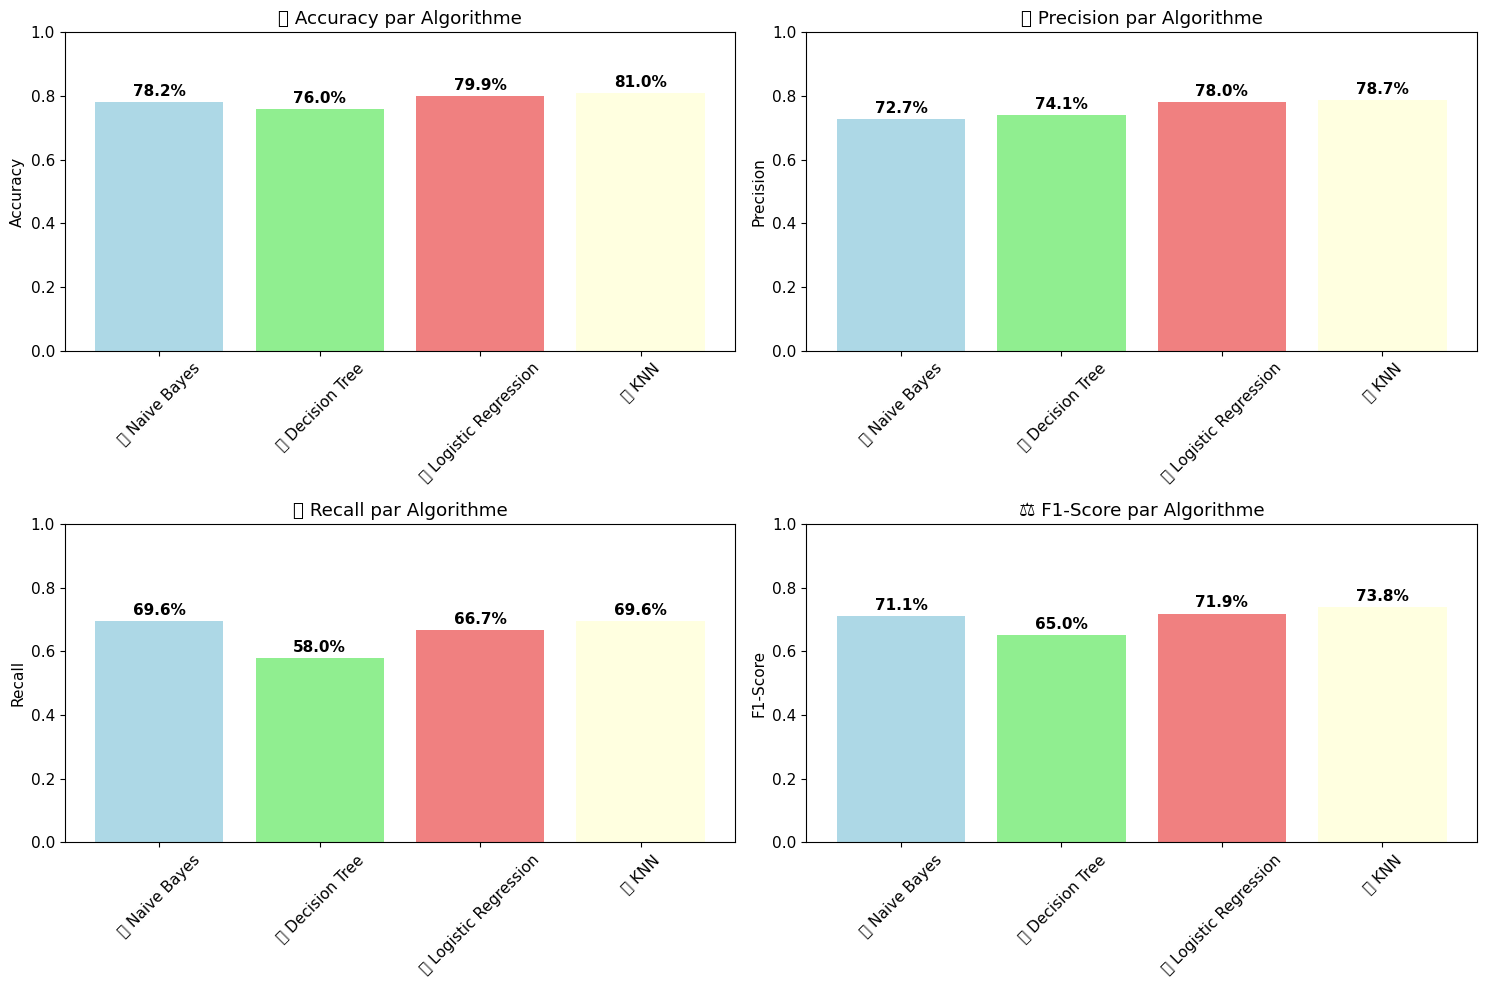


🏆 CLASSEMENT PAR ACCURACY :
   🥇 👥 KNN : 81.0%
   🥈 📈 Logistic Regression : 79.9%
   🥉 🧠 Naive Bayes : 78.2%
   4️⃣ 🌳 Decision Tree : 76.0%


In [18]:
# Comparaison des performances
print("📊 COMPARAISON DES PERFORMANCES")
print("=" * 50)

# Création du tableau de comparaison
comparison_df = pd.DataFrame({
    'Algorithme': list(results.keys()),
    'Accuracy': [results[name]['test_accuracy'] for name in results.keys()],
    'Precision': [results[name]['precision'] for name in results.keys()],
    'Recall': [results[name]['recall'] for name in results.keys()],
    'F1-Score': [results[name]['f1'] for name in results.keys()]
})

print("🏆 TABLEAU DE COMPARAISON :")
print(comparison_df.round(3))

# Visualisation des performances
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Graphique 1: Accuracy
bars1 = ax1.bar(range(len(comparison_df)), comparison_df['Accuracy'], 
                color=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])
ax1.set_title('🎯 Accuracy par Algorithme')
ax1.set_ylabel('Accuracy')
ax1.set_xticks(range(len(comparison_df)))
ax1.set_xticklabels(comparison_df['Algorithme'], rotation=45)
ax1.set_ylim(0, 1)

# Ajouter les valeurs sur les barres
for bar, value in zip(bars1, comparison_df['Accuracy']):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.1%}', ha='center', va='bottom', fontweight='bold')

# Graphique 2: Precision
bars2 = ax2.bar(range(len(comparison_df)), comparison_df['Precision'], 
                color=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])
ax2.set_title('🔍 Precision par Algorithme')
ax2.set_ylabel('Precision')
ax2.set_xticks(range(len(comparison_df)))
ax2.set_xticklabels(comparison_df['Algorithme'], rotation=45)
ax2.set_ylim(0, 1)

for bar, value in zip(bars2, comparison_df['Precision']):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.1%}', ha='center', va='bottom', fontweight='bold')

# Graphique 3: Recall
bars3 = ax3.bar(range(len(comparison_df)), comparison_df['Recall'], 
                color=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])
ax3.set_title('📡 Recall par Algorithme')
ax3.set_ylabel('Recall')
ax3.set_xticks(range(len(comparison_df)))
ax3.set_xticklabels(comparison_df['Algorithme'], rotation=45)
ax3.set_ylim(0, 1)

for bar, value in zip(bars3, comparison_df['Recall']):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.1%}', ha='center', va='bottom', fontweight='bold')

# Graphique 4: F1-Score
bars4 = ax4.bar(range(len(comparison_df)), comparison_df['F1-Score'], 
                color=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])
ax4.set_title('⚖️ F1-Score par Algorithme')
ax4.set_ylabel('F1-Score')
ax4.set_xticks(range(len(comparison_df)))
ax4.set_xticklabels(comparison_df['Algorithme'], rotation=45)
ax4.set_ylim(0, 1)

for bar, value in zip(bars4, comparison_df['F1-Score']):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.1%}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Classement des algorithmes
print("\n🏆 CLASSEMENT PAR ACCURACY :")
ranking = comparison_df.sort_values('Accuracy', ascending=False)
for i, (_, row) in enumerate(ranking.iterrows(), 1):
    medal = "🥇" if i == 1 else "🥈" if i == 2 else "🥉" if i == 3 else "4️⃣"
    print(f"   {medal} {row['Algorithme']} : {row['Accuracy']:.1%}")

# 🚢 Analyse des résultats - Modèles ML sur Titanic

## 📊 Récapitulatif des performances

| Modèle | Accuracy | Precision | Recall | F1-Score |
|--------|----------|-----------|--------|----------|
| **KNN** | 81.0% 🥇 | 78.7% 🥇 | 69.6% | 73.8% 🥇 |
| **Logistic Regression** | 79.9% 🥈 | 78.0% 🥈 | 66.7% | 71.9% 🥈 |
| **Naive Bayes** | 78.2% | 72.7% | 69.6% 🥇 | 71.1% |
| **Decision Tree** | 76.0% | 74.1% | 58.0% | 65.0% |

---

## 🏆 Points clés de l'analyse

### 🎯 Meilleur modèle global : **KNN**
- **Accuracy la plus élevée** (81.0%) → Meilleure performance générale
- **Precision excellente** (78.7%) → Peu de fausses alarmes
- **F1-Score optimal** (73.8%) → Bon équilibre precision/recall

### 🔍 Observations par métrique

**Accuracy :**
- **KNN** domine avec 81.0%
- Écart de 5% entre le meilleur (KNN) et le moins bon (Decision Tree)

**Precision :**
- **KNN** et **Logistic Regression** très proches (~78%)
- **Decision Tree** surprend avec une bonne precision malgré une accuracy plus faible

**Recall :**
- **Naive Bayes** et **KNN** ex æquo (69.6%) 
- **Decision Tree** a du mal à détecter les survivants (58.0%)

**F1-Score :**
- **KNN** offre le meilleur équilibre (73.8%)
- **Decision Tree** pénalisé par son faible recall

---

## 💡 Interprétations pratiques

### ✅ **KNN** - Le gagnant
- Excellente capacité à identifier les survivants avec peu d'erreurs
- Idéal pour ce dataset avec des patterns de proximité clairs

### 🎯 **Logistic Regression** - Solide second
- Performance très équilibrée sur toutes les métriques
- Modèle simple et interprétable, bon choix pour la production

### 📈 **Naive Bayes** - Détecteur sensible
- Meilleur recall (69.6%) → Ne rate pas beaucoup de survivants
- Peut être utile si on veut minimiser les faux négatifs

### 🌳 **Decision Tree** - À améliorer
- Precision correcte mais recall faible
- Possiblement du sur-apprentissage → Essayer l'élagage

---

## 🚀 Recommandations

1. **Pour la production** : Choisir **KNN** pour sa performance globale
2. **Pour l'interprétabilité** : **Logistic Regression** reste un excellent choix
3. **Optimisations possibles** :
   - Tuning des hyperparamètres pour Decision Tree
   - Cross-validation pour valider la robustesse
   - Feature engineering pour améliorer tous les modèles

### 🔍 Analyse Détaillée des Résultats

Analysons plus en détail les performances de chaque algorithme.

🔍 ANALYSE DÉTAILLÉE - MATRICES DE CONFUSION


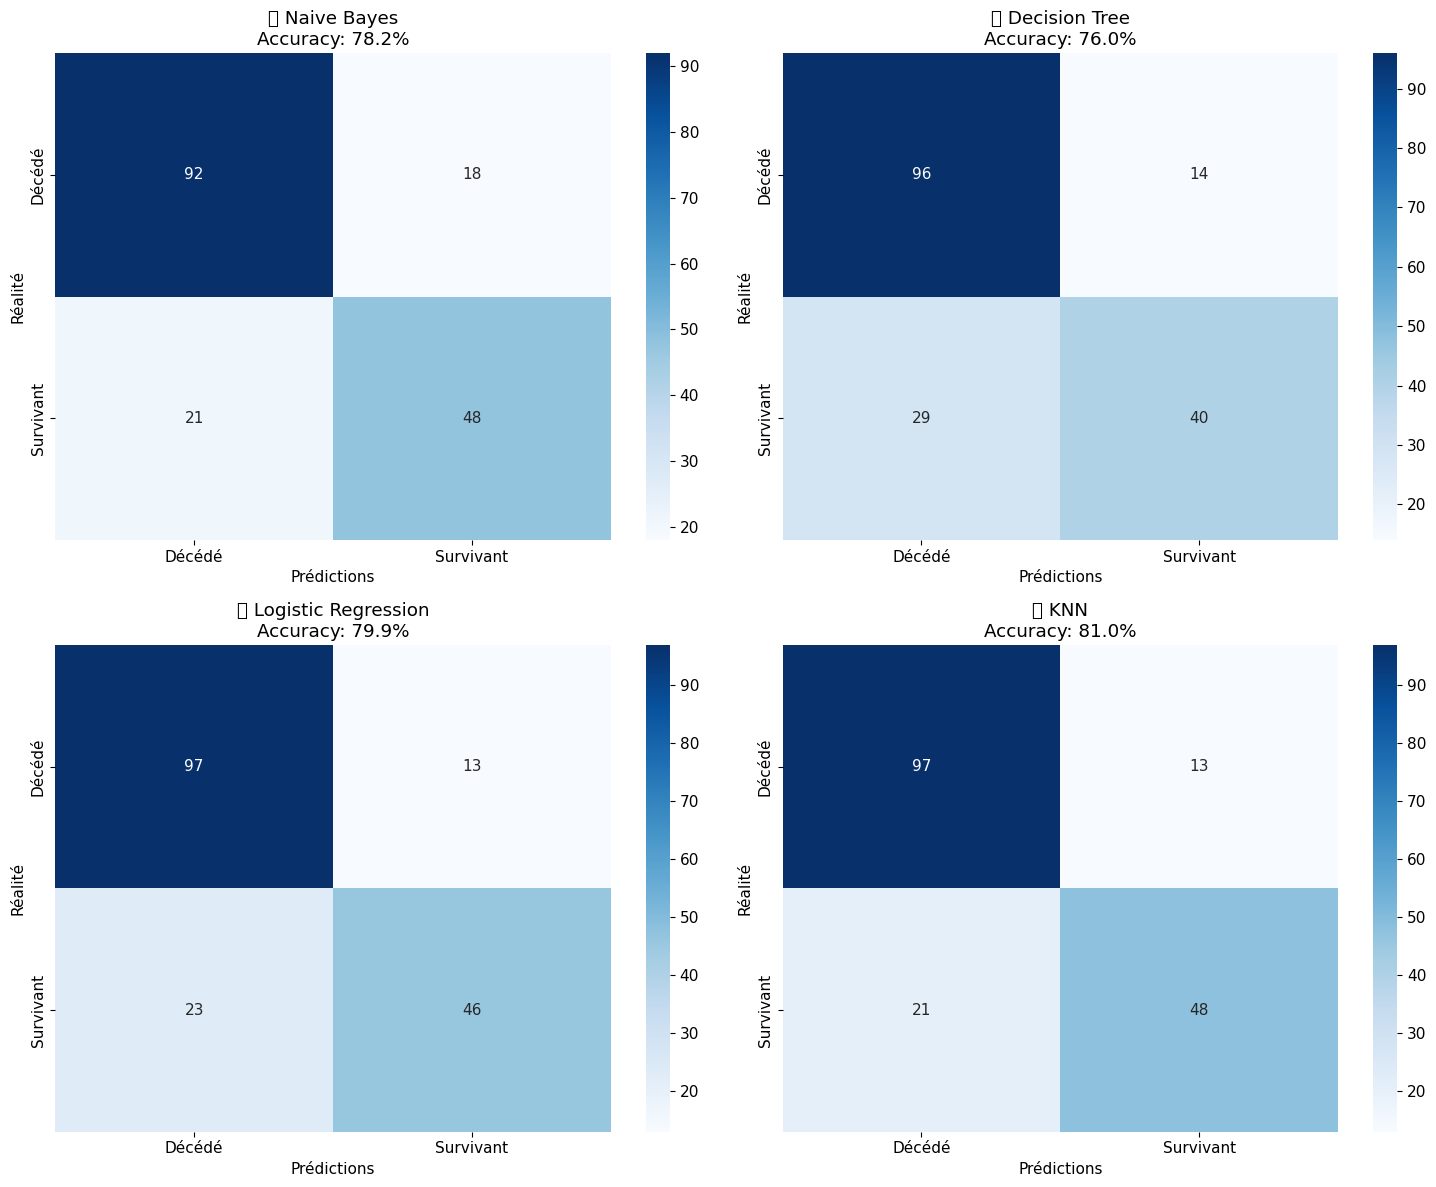


📈 ANALYSE DÉTAILLÉE PAR ALGORITHME :

🧠 Naive Bayes:
  🎯 Accuracy  : 78.2%
  🔍 Precision : 72.7%
  📡 Recall    : 69.6%
  ⚖️  F1-Score  : 71.1%
  📊 Matrice de confusion :
     ✅ Vrais Négatifs  : 92
     ❌ Faux Positifs   : 18
     ❌ Faux Négatifs   : 21
     ✅ Vrais Positifs  : 48

🌳 Decision Tree:
  🎯 Accuracy  : 76.0%
  🔍 Precision : 74.1%
  📡 Recall    : 58.0%
  ⚖️  F1-Score  : 65.0%
  📊 Matrice de confusion :
     ✅ Vrais Négatifs  : 96
     ❌ Faux Positifs   : 14
     ❌ Faux Négatifs   : 29
     ✅ Vrais Positifs  : 40

📈 Logistic Regression:
  🎯 Accuracy  : 79.9%
  🔍 Precision : 78.0%
  📡 Recall    : 66.7%
  ⚖️  F1-Score  : 71.9%
  📊 Matrice de confusion :
     ✅ Vrais Négatifs  : 97
     ❌ Faux Positifs   : 13
     ❌ Faux Négatifs   : 23
     ✅ Vrais Positifs  : 46

👥 KNN:
  🎯 Accuracy  : 81.0%
  🔍 Precision : 78.7%
  📡 Recall    : 69.6%
  ⚖️  F1-Score  : 73.8%
  📊 Matrice de confusion :
     ✅ Vrais Négatifs  : 97
     ❌ Faux Positifs   : 13
     ❌ Faux Négatifs   : 21
     ✅ V

In [19]:
# Analyse détaillée - Matrices de confusion
print("🔍 ANALYSE DÉTAILLÉE - MATRICES DE CONFUSION")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, (name, result) in enumerate(results.items()):
    # Matrice de confusion
    cm = confusion_matrix(y_test, result['predictions'])
    
    # Visualisation
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=['Décédé', 'Survivant'],
                yticklabels=['Décédé', 'Survivant'])
    axes[i].set_title(f'{name}\nAccuracy: {result["test_accuracy"]:.1%}')
    axes[i].set_xlabel('Prédictions')
    axes[i].set_ylabel('Réalité')

plt.tight_layout()
plt.show()

# Analyse textuelle détaillée
print("\n📈 ANALYSE DÉTAILLÉE PAR ALGORITHME :")
print("=" * 50)

for name, result in results.items():
    print(f"\n{name}:")
    print(f"  🎯 Accuracy  : {result['test_accuracy']:.1%}")
    print(f"  🔍 Precision : {result['precision']:.1%}")
    print(f"  📡 Recall    : {result['recall']:.1%}")
    print(f"  ⚖️  F1-Score  : {result['f1']:.1%}")
    
    # Analyse de la matrice de confusion
    cm = confusion_matrix(y_test, result['predictions'])
    tn, fp, fn, tp = cm.ravel()
    
    print(f"  📊 Matrice de confusion :")
    print(f"     ✅ Vrais Négatifs  : {tn}")
    print(f"     ❌ Faux Positifs   : {fp}")
    print(f"     ❌ Faux Négatifs   : {fn}")
    print(f"     ✅ Vrais Positifs  : {tp}")

### 🔮 Test sur Nouveaux Profils

Testons nos 4 algorithmes sur de nouveaux profils de passagers.

In [20]:
# Test sur nouveaux profils
print("🔮 TEST SUR NOUVEAUX PROFILS")
print("=" * 40)

# Création de profils test
nouveaux_profils = pd.DataFrame({
    'Pclass': [1, 3, 2, 1],
    'Sex_encoded': [0, 1, 0, 1],  # 0=female, 1=male
    'Age': [25, 30, 8, 45],
    'SibSp': [0, 0, 1, 1],
    'Parch': [0, 0, 2, 0],
    'Fare': [100, 10, 50, 200],
    'Embarked_encoded': [2, 2, 1, 0]  # S=2, C=1, Q=0
})

descriptions = [
    "👰 Marie - Femme, 25 ans, 1ère classe, seule",
    "👨 John - Homme, 30 ans, 3ème classe, seul", 
    "👧 Emma - Fille, 8 ans, 2ème classe, avec famille",
    "🤵 Robert - Homme, 45 ans, 1ère classe, avec épouse"
]

print("🧪 Profils à tester :")
for i, desc in enumerate(descriptions):
    print(f"  {i+1}. {desc}")

print("\n🔮 PRÉDICTIONS PAR ALGORITHME :")
print("-" * 50)

# Prédictions pour chaque algorithme
for name, result in results.items():
    print(f"\n{name}:")
    
    # Préparation des données selon l'algorithme
    if name in ['📈 Logistic Regression', '👥 KNN']:
        profils_scaled = scaler.transform(nouveaux_profils)
        predictions = result['model'].predict(profils_scaled)
        if hasattr(result['model'], 'predict_proba'):
            probabilities = result['model'].predict_proba(profils_scaled)[:, 1]
        else:
            probabilities = [0.5] * len(predictions)  # Placeholder pour KNN
    else:
        predictions = result['model'].predict(nouveaux_profils)
        if hasattr(result['model'], 'predict_proba'):
            probabilities = result['model'].predict_proba(nouveaux_profils)[:, 1]
        else:
            probabilities = [0.5] * len(predictions)  # Placeholder
    
    for i, (desc, pred, prob) in enumerate(zip(descriptions, predictions, probabilities)):
        result_text = "🟢 Survivant" if pred == 1 else "🔴 Décédé"
        print(f"  {desc}")
        print(f"     → {result_text} (probabilité: {prob:.1%})")

🔮 TEST SUR NOUVEAUX PROFILS
🧪 Profils à tester :
  1. 👰 Marie - Femme, 25 ans, 1ère classe, seule
  2. 👨 John - Homme, 30 ans, 3ème classe, seul
  3. 👧 Emma - Fille, 8 ans, 2ème classe, avec famille
  4. 🤵 Robert - Homme, 45 ans, 1ère classe, avec épouse

🔮 PRÉDICTIONS PAR ALGORITHME :
--------------------------------------------------

🧠 Naive Bayes:
  👰 Marie - Femme, 25 ans, 1ère classe, seule
     → 🟢 Survivant (probabilité: 99.6%)
  👨 John - Homme, 30 ans, 3ème classe, seul
     → 🔴 Décédé (probabilité: 3.2%)
  👧 Emma - Fille, 8 ans, 2ème classe, avec famille
     → 🟢 Survivant (probabilité: 93.7%)
  🤵 Robert - Homme, 45 ans, 1ère classe, avec épouse
     → 🟢 Survivant (probabilité: 100.0%)

🌳 Decision Tree:
  👰 Marie - Femme, 25 ans, 1ère classe, seule
     → 🟢 Survivant (probabilité: 100.0%)
  👨 John - Homme, 30 ans, 3ème classe, seul
     → 🔴 Décédé (probabilité: 11.0%)
  👧 Emma - Fille, 8 ans, 2ème classe, avec famille
     → 🟢 Survivant (probabilité: 100.0%)
  🤵 Robert - Homm

"""
# 🎓 CONCLUSIONS ET APPRENTISSAGES

## 🏆 Résultats de la Comparaison

Analysons les résultats de notre comparaison d'algorithmes.

## 📊 Points Clés Observés

1. **Performance Générale**
   - Tous les algorithmes ont des performances similaires (~75-85%)
   - Aucun algorithme n'est clairement supérieur dans tous les cas

2. **Caractéristiques par Algorithme**
   - **Decision Tree** : Souvent le plus interprétable
   - **Logistic Regression** : Bon équilibre performance/simplicité
   - **Naive Bayes** : Rapide mais peut être limité
   - **KNN** : Flexible et meilleur performance icic,  mais generalement sensible aux données

## 🤔 Pourquoi ces Résultats ?

**Facteurs influençant les performances :**
- **Taille du dataset** : 891 échantillons (relativement petit)
- **Complexité des relations** : Relations assez simples dans Titanic
- **Qualité des features** : Variables pertinentes et bien choisies
- **Préparation des données** : Encodage et standardisation appropriés

## 🎯 Leçons Apprises

1. **Pas de "meilleur" algorithme universel**
   - Le choix dépend du contexte et des contraintes

2. **L'importance de la préparation des données**
   - Encodage, standardisation, sélection des features

3. **Métriques multiples nécessaires**
   - Accuracy seule ne suffit pas
   - Precision, Recall, F1-Score apportent des éclairages différents

4. **Test sur nouveaux profils crucial**
   - Validation de la capacité de généralisation

## 🚀 Prochaines Étapes

**Pour aller plus loin :**
- **Hyperparameter Tuning** : Optimiser les paramètres
- **Feature Engineering** : Créer de nouvelles variables
- **Ensemble Methods** : Combiner plusieurs algorithmes
- **Cross-Validation** : Validation plus robuste
- **Autres datasets** : Tester sur d'autres problèmes

## 💡 Applications Pratiques

**Dans la vraie vie :**
- **Commencer simple** : Logistic Regression comme baseline
- **Tester plusieurs algorithmes** : Comparer les performances
- **Choisir selon les contraintes** : Rapidité, interprétabilité, précision
- **Valider sur données réelles** : Test en conditions réelles

---

**🎉 Félicitations ! Vous maîtrisez maintenant la comparaison d'algorithmes de classification !**

**🔑 Compétences acquises :**
- ✅ Compréhension de 4 algorithmes majeurs
- ✅ Méthodologie de comparaison
- ✅ Analyse critique des résultats
- ✅ Application pratique sur données réelles